# Univariate Analysis

- Analyzing/visualizing the dataset by taking one variable at a time

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data set
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
# Identify numerical features
numerical_features = df.select_dtypes(include=['number']).columns
# Display the identified features
print(f"Numerical Features: {numerical_features}")

# Identify categorical features
categorical_features = df.select_dtypes(exclude=['number']).columns
# Display the identified features
print(f"Categorical Features: {categorical_features}")

Numerical Features: Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')
Categorical Features: Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Date', 'Time', 'Payment'],
      dtype='object')


## Analyzing Numerical Variables

## 1. Descriptive statistics

In [5]:
# Descriptive statistics
descriptive_stats = df['Quantity'].describe()
print(descriptive_stats)

count    1000.000000
mean        5.510000
std         2.923431
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Quantity, dtype: float64


In [6]:
#  Mode (most frequent value)
mode_value = df['Quantity'].mode()[0]  # mode() returns a Series, so we access the first mode value
print(f"Mode: {mode_value}")

Mode: 10


In [7]:
# Variance
variance = df['Quantity'].var()
print(f"Variance: {variance}")

Variance: 8.546446446446451


## 2. Skewness and Kurtosis 

In [8]:
# 2. Skewness and Kurtosis
skewness = df['Quantity'].skew()
print(f"Skewness: {skewness}")

kurtosis = (df['Quantity']).kurt()
print(f"Kurtosis: {kurtosis}")

Skewness: 0.012941048017172435
Kurtosis: -1.2155472264752434


## 3. Custom Percentiles

In [9]:
custom_percentiles = df['Quantity'].quantile([0.10, 0.90])
print(f"10th Percentile: {custom_percentiles[0.10]}")
print(f"90th Percentile: {custom_percentiles[0.90]}")

10th Percentile: 1.0
90th Percentile: 10.0


## 4. Interquartile Range (IQR)

In [10]:
## 4. Interquartile Range (IQR)
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
print(f"IQR: {IQR}")

IQR: 5.0


## 5. Outlier Detection
- Outliers are typically defined as values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR

In [11]:
# Detecting outliers
outliers = df[(df['Quantity'] < (Q1 - 1.5 * IQR)) | (df['Quantity'] > (Q3 + 1.5 * IQR))]
print("Outliers:\n", outliers)

Outliers:
 Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Date, Time, Payment, cogs, gross margin percentage, gross income, Rating]
Index: []


## Analyzing Categorical Variables

## Frequency Distribution

In [12]:
category_counts = df['Branch'].value_counts()
print(f"Frequency Distribution:\n{category_counts}")

Frequency Distribution:
Branch
A    340
B    332
C    328
Name: count, dtype: int64


## Mode

In [13]:
# 2. Mode (Most frequent category)
mode_category = df['Branch'].mode()[0]
print(f"Most frequent category: {mode_category}")

Most frequent category: A


## Proportions

In [14]:
# 3. Proportions (relative frequencies)
category_proportions = df['Branch'].value_counts(normalize=True)
print(f"Proportions:\n{category_proportions}")

Proportions:
Branch
A    0.340
B    0.332
C    0.328
Name: proportion, dtype: float64


# Visualizing Numerical Variables

#### Visualization Techniques for numerical variables
- 1. Histogram
- 2. KDE(Kernel Density Estimation) or Density Plot
- 3. Distribution Plot (Histogram + KDE)
- 4. Box plot
- 5. Violin Plot (combination of the box plot (for quartiles and outliers) and the density plot (for distribution))

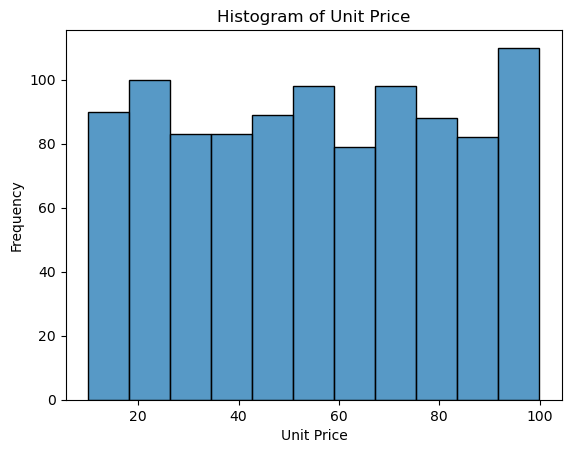

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the histogram 
sns.histplot(df['Unit price'])

# Update title to mention "Histogram"
plt.title('Histogram of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

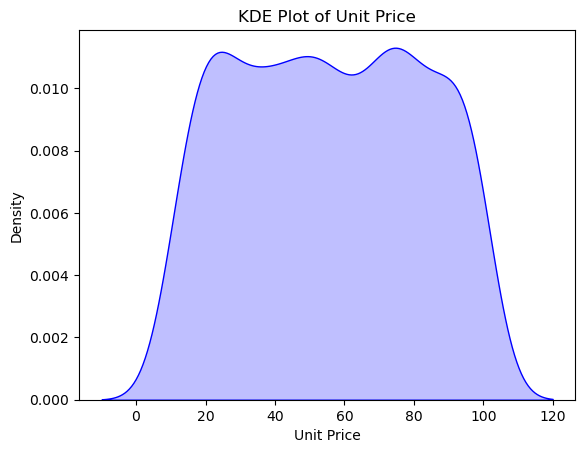

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the KDE plot
sns.kdeplot(df['Unit price'], shade=True, color='Blue')

# Update title to mention "KDE Plot"
plt.title('KDE Plot of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Density')
plt.show()

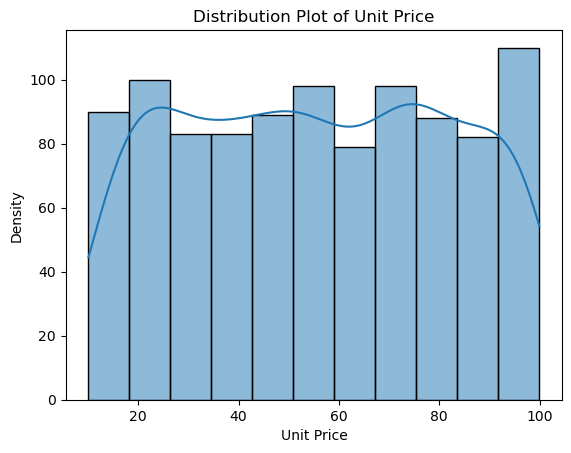

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the Histogram + KDE plot
sns.histplot(df['Unit price'], kde = True)

# Update title to mention "KDE Plot"
plt.title('Distribution Plot of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Density')
plt.show()

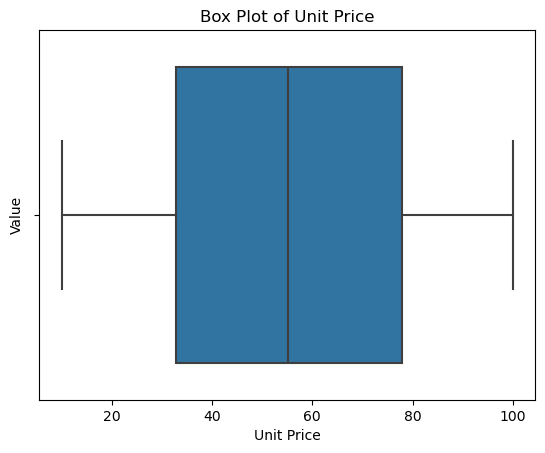

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the Box Plot
sns.boxplot(x=df['Unit price'])

# Update title and labels for the box plot
plt.title('Box Plot of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Value')

# Show the plot
plt.show()

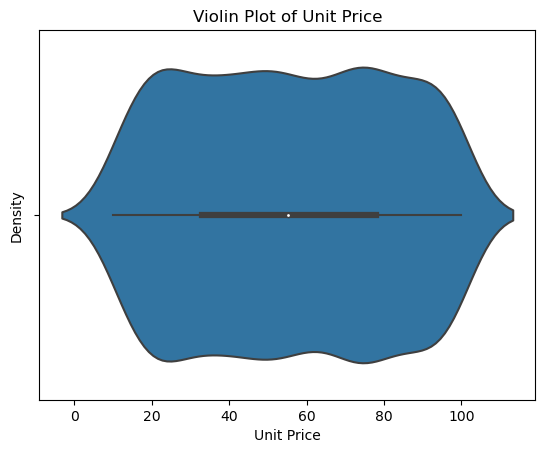

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the Violin Plot
sns.violinplot(x = df['Unit price'])

# Update title and labels for the violin plot
plt.title('Violin Plot of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Density')

# Show the plot
plt.show()

# Visualizing Categorical Variables

#### Common Visualization Techniques for Categorical Variables
- 1. Bar Chart (Bar Plot) 
- 2. Count Plot
- 3. Pie chart
##### Note
- Both Bar Chart and Count plot  are used to visualize the frequency or count of each  category.
- But in Bar Plot, we explictly add the count values.

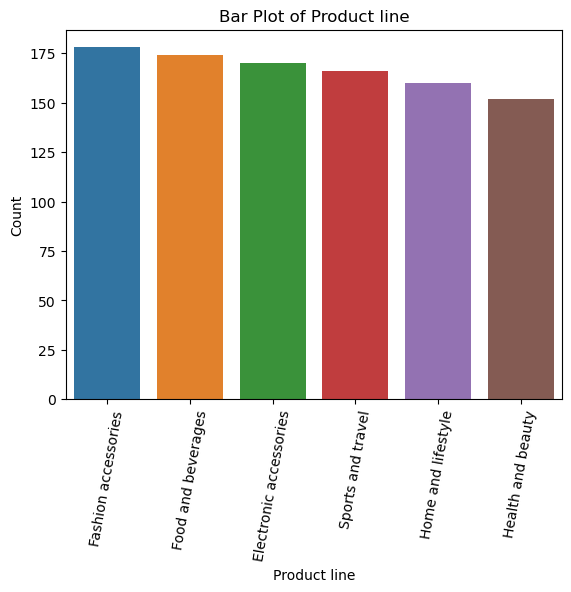

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for the 'City' column with explicit count values
Productline_counts = df['Product line'].value_counts()

sns.barplot(x=Productline_counts.index, y=Productline_counts.values)

# Adding title and labels to the plot
plt.title('Bar Plot of Product line')
plt.xlabel('Product line')
plt.ylabel('Count')
plt.xticks(rotation = 80)
# Display the plot
plt.show()

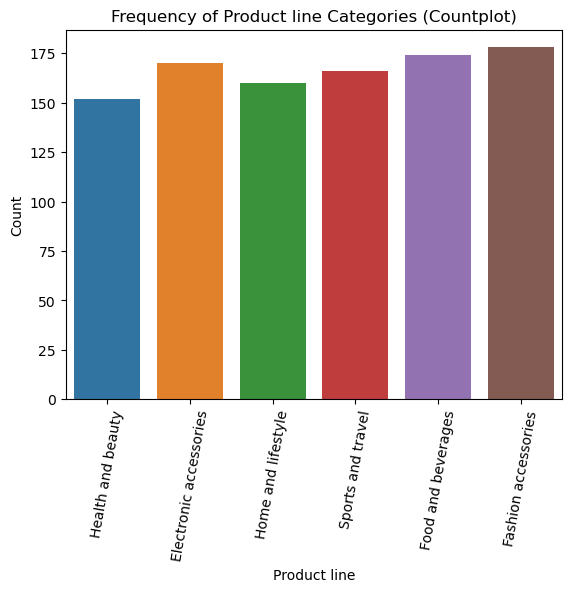

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for 'City' column in the dataframe 'df'
sns.countplot(x='Product line', data=df)

# Adding title and labels to the plot
plt.title('Frequency of Product line Categories (Countplot)')
plt.xlabel('Product line')
plt.ylabel('Count')
plt.xticks(rotation = 80)

# Display the plot
plt.show()

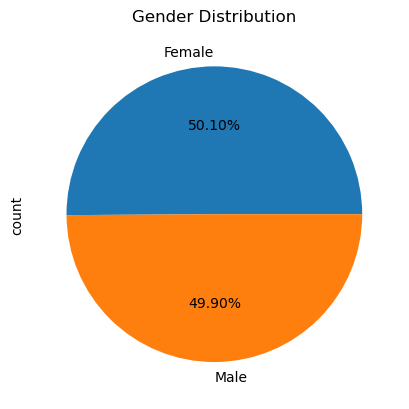

In [47]:
import matplotlib.pyplot as plt
# Pie chart for 'Gender' column
df['Gender'].value_counts().plot(kind='pie', autopct='%1.2f%%')

# Adding title to the pie chart
plt.title('Gender Distribution')

# Display the plot
plt.show()